# Homework 3

**Due: 03/05/2020**

## References

+ Chapter 1, 2 from the [Bishop textbook](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf).
+ Lectures 12, 13 (inclusive).



## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.


## Student details

+ **First Name: Ali
+ **Last Name: Lafzi
+ **Email: alafzi@purdue.edu

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_context('paper')
sns.set_style('white')
sns.set()
import scipy.stats as st
from sklearn.datasets import make_spd_matrix

# Problem 1

Suppose you conduct some experiments and collect a dataset of $N$ pairs of input and target variables, $\mathcal{D} = (x_{1:N}, y_{1:N})$, where $x_i \in \mathbb{R}$ and $y_i \in \mathbb{R}$, $\forall i$. 
Assume a Gaussian likelihood with the mean being a generalized linear model with weights $\mathbf{w}\in\mathbb{R}^m$ and basis functions $\boldsymbol{\phi}(x)\in\mathbb{R}^M$, and the noise variance being a constant $\sigma^2$.
On the weights, use an isotropic Gaussian prior, with precision parameter, $\alpha$.

1. Derive expressions for $\mathbf{m}_{N}$ and $\mathbf{S}_{N}$, the posterior mean and covariance of the model parameters respectively. Ask the question: What do I know about the weights given all the data I have seen? You will need Bayes rule for updating the weights and little bit of algebra. In particular, you will need a trick called "completing the square."

2. Use the results from part 1 to derive the posterior predictive distribution at an arbitrary test input $x^{*}$. Ask the question: What do I know about the $y^*$ at $x^*$ given all the data I have seen? You will need the sum rule of probability theory to connect this question to the likehood and the posterior you obtained in step 1.

3. Suppose now you perform an additional experiment and receive a data-point, $\mathcal{D}_{N+1}=(x_{N+1}, y_{N+1})$. Using the current posterior distribution over the parameters as the new prior, show that updating the model with the $(N+1)^{th}$ data-point results in the same posterior distribution shown above, with $N$ replaced by $N+1$.

The required expressions for all  of the above cases are well-known in closed form. It is, however, useful to work through the algebra atleast once. Feel free to consult Bishop's book, but in the end present your own derivation from scratch.

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br>
**Part 1**

$p(\mathbf{w}|\alpha) = \mathcal{N}(\mathbf{w}|0,\alpha^{-1}I)=(\frac{1}{2\pi})^{\frac{m}{2}} e^{-\frac{\alpha}{2}||\mathbf{w}||^2}$

$p(y_{1:n}|x_{1:n},\mathbf{w},\sigma)=(2\pi)^{\frac{n}{2}}\sigma^{-n}exp(\frac{-1}{2\sigma^2}||\Phi\mathbf{w}-y_{1:n}||^2)$

$p(\mathbf{w}|y_{1:n},x_{1:n},\alpha,\sigma)=\frac{p(y|\alpha,\mathbf{w},\sigma)p(\mathbf{w}|\alpha)}{Normalization \ Constant}$ and $||\Phi\mathbf{w}-y_{1:n}||^2=(\Phi\mathbf{w}-y_{1:n})^T(\Phi\mathbf{w}-y_{1:n})$

$p(\mathbf{w}|y_{1:n},x_{1:n},\alpha,\sigma) \propto exp(\frac{-1}{2\sigma^2}||\Phi\mathbf{w}-y_{1:n}||^2-\mathbf{w}^T\alpha^{-1}\mathbf{w})$

$\propto exp(\frac{-1}{2\sigma^2} y^2 + \frac{1}{\sigma^2} 2\mathbf{w}^T\Phi y + \frac{1}{\sigma^2} \mathbf{w}^T \Phi \Phi^T \mathbf{w} + \mathbf{w}^T \alpha^{-1} \mathbf{w})$

$\propto exp(-\mathbf{w}^T (\frac{-1}{\sigma^2} \Phi \Phi^T+\alpha^{-1}I) \mathbf{w} - 2\mathbf{w}^T(\frac{\Phi y}{\sigma^2})) $

It is known that: $(\mathbf{w}-\mu)^TL(\mathbf{w}-\mu)=\mathbf{w}^TL\mathbf{w}-2\mathbf{w}^TL\mu+\mu^TL\mu$

if $L=\frac{1}{\sigma^2}\Phi \Phi^T+\alpha^{-1}I$,  then: $L\mu=\frac{\Phi y}{\sigma^2}  \longrightarrow \mu=L^{-1}\frac{\Phi y}{\sigma^2}$

$S=L^{-1}=(\frac{1}{\sigma^2}\Phi \Phi^T+\alpha^{-1}I)^{-1}$

$m=\mu=S\frac{1}{\sigma^2}\Phi y$

$ \Rightarrow p(\mathbf{w}|y_{1:n},x_{1:n},\alpha,\sigma) \propto exp(-\mathbf{w}^T S^{-1} \mathbf{w}-2\mathbf{w}^T S^{-1} m)$

<br><br>

**Part 2**

$p(y|x,X,Y)=\int{p(y|x,\mathbf{w}) \ p(\mathbf{w}|X,Y)}$

$p(y|x,\mathbf{w},\sigma)=\mathcal{N}(y|\mathbf{w}^T\Phi,\sigma^2)$

$p(y|x,y)=\mathcal{N}(\mathbf{w}|m,S)$ where  $m=\sigma^{-2}S\Phi^TY$, $S=(\sigma^{-2}\Phi^T\Phi+\alpha^{-1}I)^{-1}$

$p(y|x,X,Y)=\int{exp(-\frac{(Y-\mathbf{w}^T\Phi)^2}{2\sigma^2}) exp(-\frac{(\mathbf{w}-m)^TS^{-1}(\mathbf{w}-m)}{2})}$

$\propto \int{exp(\frac{-1}{2\sigma^2}(Y^2-2\mathbf{w}^T\Phi Y+(\mathbf{w}^T\Phi)^2)-\frac{1}{2}(\mathbf{w}^TS\mathbf{w}-2\mathbf{w}^TSm+m^TSm))d\mathbf{w}}$

$\propto \int{exp(\frac{1}{\sigma^2}Y^2-\frac{1}{\sigma^2}2\mathbf{w}^T\Phi Y+\frac{1}{\sigma^2}\mathbf{w}^T\Phi \Phi^T \mathbf{w}+\mathbf{w}^TS\mathbf{w}-2\mathbf{w}^TSm)d\mathbf{w}}$

$\propto \int{exp(-\mathbf{w}^T(\frac{1}{\sigma^2}\Phi \Phi^T+S^{-1})\mathbf{w}-2\mathbf{w}^T(\frac{1}{\sigma^2}\Phi Y+S^{-1}m)+\frac{1}{\sigma^2}Y^2)d\mathbf{w}}$

Again: $(\mathbf{w}-\mu)^TL(\mathbf{w}-\mu)=\mathbf{w}^TL\mathbf{w}-2\mathbf{w}^TL\mu+\mu^TL\mu$

if $L=\frac{1}{\sigma^2}\Phi \Phi^T+S^{-1}$,  then: $L\mu=\frac{\Phi y}{\sigma^2}+S^{-1}m  \longrightarrow \mu=L^{-1}(\frac{\Phi y}{\sigma^2}+S^{-1}m)$

$ \Rightarrow p(y|x,X,Y) \propto \int{exp(\frac{-1}{2\sigma^2}(\mathbf{w}-\mu)^TL(\mathbf{w}-\mu)) exp(\frac{1}{2}\mu^TL\mu-\frac{1}{2\sigma^2}Y^2) d\mathbf{w}}$

<br>
$exp(\frac{1}{2}\mu^TL\mu-\frac{1}{2\sigma^2}Y^2)$ is not a function of $\mathbf{w}$

$ \Rightarrow p(y|x,X,Y) \propto exp(\frac{1}{2}\mu^TL\mu-\frac{1}{2\sigma^2}Y^2) \int{exp(\frac{-1}{2\sigma^2}(\mathbf{w}-\mu)^TL(\mathbf{w}-\mu))  d\mathbf{w}}$

<br>
$\int{exp(\frac{-1}{2\sigma^2}(\mathbf{w}-\mu)^TL(\mathbf{w}-\mu))  d\mathbf{w}}$ is equal to 1.

$ \Rightarrow p(y|x,X,Y) \propto exp(\frac{1}{2}\mu^TL\mu-\frac{1}{2\sigma^2}Y^2)$

$\mu^TL\mu = (\frac{1}{\sigma^2}y \Phi +Sm)^T (L^{-1})^TLL^{-1}(\frac{1}{\sigma^2} \Phi+Sm) = \frac{1}{\sigma^2}y\phi^T L^{-1}(\frac{1}{\sigma^2}y \Phi)+\frac{2}{\sigma^2}Y\Phi^TL^{-1}Sm+m^TSL^{-1}Sm=Y^2(\frac{1}{\sigma^2}\Phi^TS^{-1}\Phi)+2Y(\frac{1}{\sigma^2}\Phi^TL^{-1}Sm)+const.$

<br><br>
$\lambda(y-\mu)^2=\lambda y^2-2\lambda \mu y+\lambda \mu^2$, and by assuming: $\lambda=\frac{1}{\sigma^2}(1-\frac{1}{\sigma^2}\Phi^TL^{-1}\Phi)=\frac{1}{S^2(x)}$, $u=\frac{1}{\lambda}(\frac{1}{\sigma^2}\Phi^TL^{-1}Sm)=m(x)$

$ \Rightarrow p(y|x,X,Y) \propto exp(\frac{-\lambda}{2}(y-u)^2) \propto exp(\frac{1}{2S^2(x)}(y-m(x))^2)$

$ \Rightarrow p(y|x,X,Y) = \mathcal{N}(y|m(x),S^2(x))$

<br><br>

**Part 3**

$\mathcal{D}_{N+1}=(x_{N+1}, y_{N+1})$

New point:

$P(\mathbf{w}|x_{N+1},y_{N+1},m_N,S_N)=\frac{P(y_{N+1}|X_N,\mathbf{w},\sigma) p(\mathbf{w}|m_N,S_N)}{Normalization \ Constant}$

$ \longrightarrow P(\mathbf{w}|x_{N+1},y_{N+1},m_N,S_N) \propto P(y_{N+1}|\mathbf{w}^T\Phi_{N+1},\sigma)\mathcal{N}(\mathbf{w}|m_NS_N)$

$\propto exp[\frac{-1}{2}\frac{(y-\mathbf{w}^T\Phi_{N+1})^T(y-\mathbf{w}^T\Phi_{N+1})}{\sigma^2}] exp[\frac{-1}{2}(\mathbf{w}-m_N)^TS_N^{-1}(\mathbf{w}-m_N)] $

$\propto exp[\frac{-1}{2\sigma^2}(y^Ty-\Phi^T_{N+1}\mathbf{w}y-y^T\mathbf{w}^T\Phi_{N+1}+\Phi^T_{N+1}\mathbf{w}\mathbf{w}^T\Phi)]   exp[\frac{-1}{2}(\mathbf{w}^TS^{-1}_N\mathbf{w}-2\mathbf{w}^TS_N^{-1}m_N+m_N^TS_N^{-1}m_N)] $


Considering the standard forms:
<br>
$S_{N+1}^{-1}=\frac{\Phi_{N+1}\Phi_{N+1}^T}{\sigma^2}+S_N^{-1}$, $-2S_{N+1}m_{N+1}=\frac{-2y\Phi}{\sigma^2}-2S_N^{-1}m_N$

$ \Rightarrow  m_{N+1}=S_{N+1}(S_N^{-1}m_N+\frac{y\Phi_{N+1}}{\sigma^2})$

$\Rightarrow P(\mathbf{w}|x_{N+1},y_{N+1},m_N,S_N)=\mathcal{N}(\mathbf{w}|m_{N+1},S_{N+1})$

where
<br>
$ m_{N+1}=S_{N+1}(S_N^{-1}m_N+\frac{y\Phi_{N+1}}{\sigma^2})$

$S_{N+1}^{-1}=\frac{\Phi_{N+1}\Phi_{N+1}^T}{\sigma^2}+S_N^{-1}$
<br><br><br>

# Problem 2

[Conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior) are an extremely useful tool in Bayesian inference.
If the posterior distribution over the unknown parameters, $\boldsymbol{\theta}$, of a statistical model is in the same family  of distributions as the prior, the prior  is said to be conjugate to the chosen likelihood. We saw one such example in class where a Gaussian prior over the unknown weights of the linear regression model lead to a Gaussian posterior under the Gaussian likelihood model. We used a fixed value of $\sigma^2$ in our analysis of the linear regression model in class.

As before, consider a Gaussian likelihood with the mean being a generalized linear model with weights $\mathbf{w}\in\mathbb{R}^m$ and basis functions $\boldsymbol{\phi}(x)\in\mathbb{R}^M$, and the noise variance being a constant $\sigma^2$
Let's treat the noise parameter also as an unknown. Let $\beta$ be the inverse noise variance, i.e., $\beta = \frac{1}{\sigma^2}$ $^{(1)}$. 
Show that the following prior over $w$ and $\beta$:
$$
p(\mathbf{w}, \beta) = \mathcal{N}(\mathbf{w}|0, (\alpha \beta)^{-1}\mathbf{I}) \mathrm{Gamma}(\beta| a_0, b_0),
$$
is conjugate.
That is, show that the posterior over $\mathbf{w}$ and $\beta$ has the same form as the prior: 
$$p(\mathbf{w}, \beta|\mathcal{D}_N, \alpha) = \mathcal{N}(w|\beta, \mathbf{m}_N, \mathbf{S}_N) \mathrm{Gamma}(\beta| a_N, b_N).$$
In doing so, recover the expressions for $\mathbf{m}_N$, $\mathbf{S}_N$, $a_N$ and $b_N$. Discuss any interesting observation you make about the form of the posterior distribution parameters.

The [Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution) has probability density:
$$
\mathrm{Gamma}(\beta|a_0, b_0) = \frac{b_0^{a_0}}{\Gamma(a)}\beta^{a_0-1}e^{-b_0\beta}
$$

(1) - _You will frequently encounter in literature the use of the precision rather than the variance when using the normal distribution. Doing so often simplifies computation_.

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br>
$p(\mathbf{w}, \beta|x_{1:N},y_{1:N},\alpha) = \frac{p(y_{1:N}|x_{1:N},\beta, \mathbf{w})p(\mathbf{w},\beta)}{Normalization \ constant} \propto p(y_{1:N}|x_{1:N},\beta, \mathbf{w})p(\mathbf{w},\beta)$

where $D: x_{1:N},y_{1:N}$ and $\sigma=\frac{1}{\sqrt{\beta}}$

$\Rightarrow p(\mathbf{w}, \beta|x_{1:N},y_{1:N},\alpha) \propto p(y_{1:N}|x_{1:N},\beta, \mathbf{w})p(\mathbf{w},\beta) = \mathcal{N}(y_{1:N}|\Phi\mathbf{w},\beta^{-1}I)\mathcal{N}(\mathbf{w}|0, (\alpha \beta)^{-1}\mathbf{I}) \mathrm{Gamma}(\beta| a_0, b_0)$

$\Rightarrow p(\mathbf{w}, \beta|x_{1:N},y_{1:N},\alpha) \propto \frac{1}{(2\pi)^{\frac{N}{2}}det(\beta^{-1}I)^{0.5}}e^{\frac{-\beta}{2}(y-\Phi \mathbf{w})^T(y-\Phi \mathbf{w})} (\frac{\alpha}{2\pi})^{\frac{m}{2}} e^{\frac{-\alpha}{2}\mathbf{w} \mathbf{w}^T}\frac{b_0^{a_0}}{\Gamma(a_0)} \beta^{a_0-1} e^{-b_0 \beta}$

$\propto \frac{\beta^{\frac{N}{2}+a_0-1}}{(2\pi)^{\frac{N}{2}}} (\frac{\alpha}{2\pi})^{\frac{m}{2}} (\frac{b_0^{a_0}}{\Gamma(a_0)}) e^{\frac{-\beta}{2}(y-\Phi \mathbf{w})^T(y-\Phi \mathbf{w})-\frac{\alpha}{2}\mathbf{w}^T\mathbf{w}} e^{-b_0 \beta}$

by setting $m_N=\beta S_N \Phi^T y$ and $S_N=(\alpha I+\beta \Phi^T \Phi)^{-1}$

$\Rightarrow p(\mathbf{w}, \beta|x_{1:N},y_{1:N},\alpha) = \frac{\beta^{\frac{N}{2}+a_0-1}}{(2\pi)^{\frac{N}{2}}} (\frac{\alpha}{2\pi})^{\frac{m}{2}} (\frac{b_0^{a_0}}{\Gamma(a_0)}) e^{-b_0\beta} \mathcal{N}(\mathbf{w}|m_N,S_N)$

we write: $a_N=\frac{N}{2}+a_0$ and $b_N=b_0$

$\Rightarrow p(\mathbf{w}, \beta|x_{1:N},y_{1:N},\alpha) = \mathcal{N}(\mathbf{w}|m_N,S_N) Gamma(\beta|a_N,b_N)$

with
<br>
$a_N=\frac{N}{2}+a_0$

$b_N=b_0$

$m_N=\beta S_N \Phi^T y$ 

$S_N=(\alpha I+\beta \Phi^T \Phi)^{-1}$
<br><br>

# Problem 3 - Some exercises on the multivariate normal 

The Bayesian linear regression model discussed in class makes extensive usage of the multivariate Gaussian distribution. ```numpy``` and ```scipy``` offer nice implementations of the multivariate normal distribution for computing densities and generating samples. However, it is useful to go through the process of developing your method for doing these things atleast once. 

Consider the random variable $\mathbf{X} \sim \mathcal{N}(\mathbf{X}|\mu, \Sigma)$, where, $\mathbf{X} \in \mathbb{R}^d$ and $\mu$ and $\Sigma$ are its mean vector and covariance matrix respectively. 

## Density of a multivariate Gaussian

The expression for  the density of the multivariate Gaussian distribution can be found [here](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). 

Note that evaluating the density function of MVN (multivariate normal) requires evaluating the inverse of the covariance matrix, $\Sigma$. Inverting a matrix is inefficient and numerically unstable and should be avoided as much as possible. 

Instead you can compute the density of the random variable $\mathbf{X}$ at an arbitrary point $\mathbf{x}$ as follows:

1. Use [```scipy.linalg.cho_factor```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.cho_factor.html#scipy.linalg.cho_factor) to perform  the Cholesky decomposition of $\Sigma$ i.e. find $\mathbf{L}$ such that $\Sigma = \mathbf{L} \mathbf{L}^T$.
2. Solve, for $\mathbf{z}$, the system of linear equations $\mathbf{L} \mathbf{L}^T \mathbf{z} = \mathbf{x} -\mu$. You can use [```scipy.linalg.cho_solve```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.cho_solve.html).
3. Put everything together to compute $p(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^d | \Sigma|}}\exp\Big[ -\frac{1}{2}(\mathbf{x}-\mu)^T \mathbf{z} \Big]$.

Here is an example with an arbitrary mean and covariance in 2 dimensions:

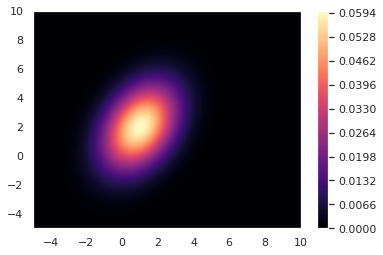

In [0]:
from scipy.linalg import cho_factor, cho_solve
d =2
mean = np.array([1, 2])[:, None]
#print (np.shape(mean)[0])
#print (mean)
cov = np.array([[2, 1], [1, 4]])
L = cho_factor(cov, lower=True)
#print (L)
diagL = np.diag(L[0])
#print (diagL)
detcov = np.prod(diagL) ** 2  #Sigma = LL^T ; Determinant of prod =  prod. of determinant.
#print (detcov)
#print (np.linalg.det(diagL)**2)
Z = 1./np.sqrt(((2*np.pi)**2)*detcov)  #normalizing constant 

#define a grid over x 
x1 = np.linspace(-5, 10, 50)
X1, X2 = np.meshgrid(x1, x1)
Xgrid = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])[:, :, None]
Pdfs = np.array([Z*np.exp(-0.5*np.dot((xp-mean).T, cho_solve(L, xp-mean))) for xp in Xgrid])  ## See note below
#print (Xgrid)

## For those new to Python, the above line uses the concept of list comprehensions in Python. 
## See here: http://www.secnetix.de/olli/Python/list_comprehensions.hawk
## This is extremely useful for looping over simple expressions. 
## See also the map function: http://book.pythontips.com/en/latest/map_filter.html

#visualize the density
plt.contourf(X1, X2, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
#print (Pdfs.shape)
#print (Pdfs)

Define a function ```mvnpdf``` which accepts an input $\mathbf{x}$ of any arbitrary dimension, $d$, and also accepts a mean vector and covariance matrix and returns the density of the normal distribution with given mean and covariance at point $\mathbf{x}$. Feel free to re-use any/all code from the example given above.

In [0]:
def mvnpdf(x, mean, cov):
  d = np.shape(mean)[0]
  L = cho_factor(cov, lower=True)
  
  diagL = np.diag(L[0])
  
  detcov = np.prod(diagL) ** 2  #Sigma = LL^T ; Determinant of prod =  prod. of determinant.
  
  Z = 1./np.sqrt(((2*np.pi)**d)*detcov)
 
  Pdf = Z*np.exp(-0.5*np.dot((x-mean).T, cho_solve(L, x-mean)))
  return Pdf

**Note: You can assume that the density is non-degenerate, i.e., the covariance matrix is positive definite.**

Let's test your implementation. Use ```numpy.random.randn``` and ```sklearn.datasets.make_spd_matrix```  to generate random mean vector and covariance matrix, $\mu$ and $\Sigma$ for a random variable in $2$ dimensions. Visualize the contours of the density function. Use ```scipy.stats.multivariate_normal``` to verify that you get the correct result. 

[[ 0.53487286]
 [-0.58436258]]
[[2.69497962 0.02826251]
 [0.02826251 0.66376639]]


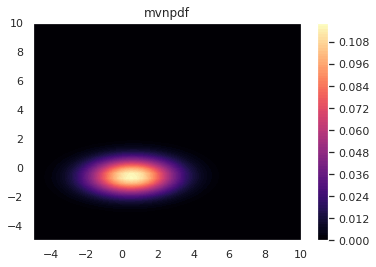

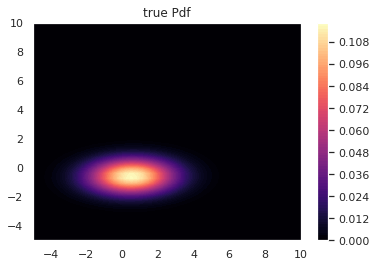

In [0]:
import scipy.stats as st
from sklearn.datasets import make_spd_matrix

d = 2
#mean = np.random.randn(d)
mean=np.random.randn(d,1) 

print (mean)
cov = make_spd_matrix(d, random_state=None)
L = cho_factor(cov, lower=True)
print (cov)
x = np.linspace(-5, 10, 50)
X1, X2 = np.meshgrid(x, x)
Xgrid = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])[:, :, None]
#print (Xgrid)
#PDFs = mvnpdf(x, mean, cov)
Pdfs = np.array([mvnpdf(x, mean, cov) for x in Xgrid])
#Pdfs = np.array([mvnpdf(x, mean, cov)*np.exp(-0.5*np.dot((x-mean).T, cho_solve(L, x-mean))) for x in Xgrid])
#print (Pdfs.shape)
#print (Pdfs)
plt.figure(0)
plt.contourf(X1, X2, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.title('mvnpdf')

plt.figure(1)
true_pdf = np.array([st.multivariate_normal.pdf(x, mean.flatten(), cov)for x in Xgrid[:,:,0]])

plt.contourf(X1, X2, true_pdf.reshape((50, 50)), 100, cmap = 'magma')
plt.title('true Pdf')
plt.colorbar()

## Sampling from a multivariate Gaussian

Recall that a univariate random variable, $\mathbf{q} \sim \mathcal{N}({\mathbf{q}|\mu, \sigma^2})$, can be expressed as $\mathbf{q} = \mu + \sigma \mathbf{z}$, where, $\mathbf{z} \sim \mathcal{N}({\mathbf{z}|0, 1})$ is a standard normal random variable. This suggests an easy approach for sampling from a univariate distribution with arbitrary mean and variance - Sample from the standard normal distribution $\mathcal{N}(0, 1)$, scale the result by standard deviation $\sigma$ and then translate by $\mu$.

The approach to sampling from a multivariate Gaussian is analogous to the univariate case. Here are the steps:
1. Compute  the Cholesky decomposition of the covariance matrix $\Sigma$ i.e. find $\mathbf{L}$ such that $\Sigma = \mathbf{L} \mathbf{L}^T$.
2. Sample a vector $\mathbf{z}$ from the multivariate standard normal in the given dimensions, i.e., $\mathcal{N}(\mathbf{0}_{d}, ,\mathbf{I}_{d\times d})$.
3. Scale and shift: $\mathbf{x} = \mu + \mathbf{L}\mathbf{z}$.

The code below samples from the MVN defined in the previous section of this question.

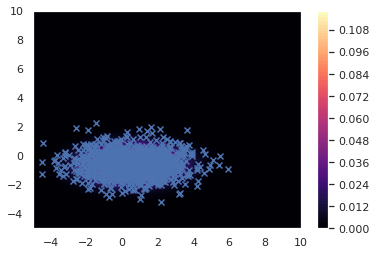

In [0]:
nsamples = 1000
samples = np.array([mean+np.dot(np.tril(L[0]), np.random.randn(2, 1)) for i in range(nsamples)])[:, :, 0]
x1 = samples[:,0]
x2 = samples[:,1]

#plot samples and compare to the pdf
plt.contourf(X1, X2, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.scatter(x1, x2, marker='x')

Note that the generated samples look like they have been drawn from the MVN defined earlier. 

Define a function ```mvnsamples``` which accepts as input the mean vector and covariance matrix of a multivariate distribution of any arbitrary dimension, $d$, and returns $n$ samples from the distribution. $n$ is also to be passed as a parameter to the function.

In [0]:
def mvnsamples(nsamples, mean, cov):
  d = np.shape(mean)[0]
  L = cho_factor(cov, lower=True)
  
  samples = np.array([mean+np.dot(np.tril(L[0]), np.random.randn(d, 1)) for i in range(nsamples)])[:, :, 0]
  return samples

Let's test your implementation. For the same mean and covariance generated earlier, draw $n$ samples and visualize it with a scatter plot. Make sure to compare the scatter plot with the density contours to verify your sampler is implemented correctly. 

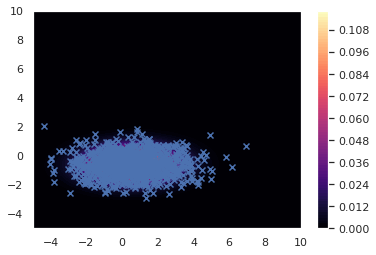

In [0]:
nsamples = 1000
samples = mvnsamples(nsamples, mean, cov)
x1 = samples[:,0]
x2 = samples[:,1]

#plot samples and compare to the pdf
plt.figure(0)

plt.contourf(X1, X2, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.scatter(x1, x2, marker='x')

# Problem 4 - Linear regression on noisy dataset

Consider the following dataset:

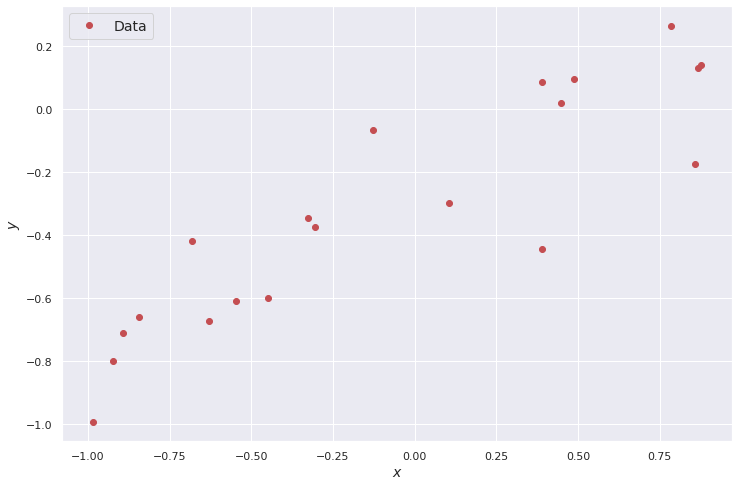

In [0]:
import os
import io
import requests
import numpy as np
url="https://raw.githubusercontent.com/PredictiveScienceLab/uq-course/master/homeworks/hw3_data1.txt" 
s=requests.get(url).content 
data = np.loadtxt(io.StringIO(s.decode('utf-8')))
#data =  np.loadtxt('hw3_data1.txt')
X = data[0, :]
Y = data[1, :]
plt.figure(figsize=(12, 8))
plt.plot(X, Y, 'ro', label = 'Data')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(loc='best', fontsize = 14)

We will try to fit the following linear regression model for this dataset: 
$$
f(x;\mathbf{w}) = w_0 + w_1 x,
$$
where, $w_0$ and $w_1$ are model  parameters. 

## Part A

### Bayesian linear regression (Part 1)

Consider the additive noise model:
$$
y = f(x;\mathbf{w}) + \epsilon = w_0 + w_1 x + \epsilon,
$$
where, $\epsilon \sim \mathcal{N}(\epsilon|0, \sigma^2)$.

Consider the following isotropic prior on the weights:
$$
p(\mathbf{w}) = \mathcal{N}(\mathbf{w}|0, \alpha^{-1}\mathbf{I}).
$$

The density function of multivariate Gaussians can be found [here](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). We will take a look at how to efficiently compute the density of multivariate Gaussians later in the course but for the time being let's use [scipy's implementation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html) of the same to visualize the prior. 

Generate a grid of $w_0$ and $w_1$ values and use scipy's ```multivariate_normal.pdf``` method to compute the prior probability density at each location of the grid. Note that the prior mean and covariance are shown in the expression above. Show the contour plot of the prior pdf. If you aren't already familiar, check out [this tutorial](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html) on matplotlib contour plots.


[0. 0.]
[[0.83333333 0.        ]
 [0.         0.83333333]]


Text(0.5, 1.0, 'prior distribution of weights')

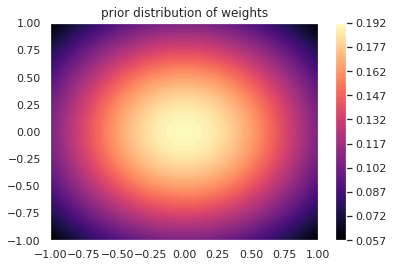

In [0]:
w = np.linspace(-1, 1, 50)
W0, W1 = np.meshgrid(w, w)
Wgrid = np.hstack([W0.flatten()[:, None], W1.flatten()[:, None]])[:, :, None]
d = 2
mean = np.zeros(d)
alpha = 1.2
cov = 1/alpha*np.eye(d)

print (mean)
print (cov)

Pdfs = np.array([st.multivariate_normal.pdf(w, mean.flatten(), cov)for w in Wgrid[:,:,0]])
plt.contourf(W0, W1, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.title('prior distribution of weights')

Generate some samples of $\mathbf{w}$ from the prior and visualize the corresponding. You can use ```numpy.multivariate_normal```. An example using arbitrary mean and covariance  is shown below:

[[3.57289321 0.88338107]]


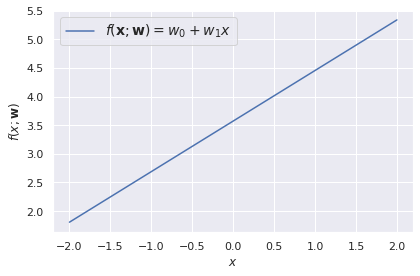

In [0]:
mean = np.array([1, 2])
cov = np.array([[2, 0], [0, 2]])
w_sample = np.random.multivariate_normal(mean = mean, cov = cov, size = 1)
print (w_sample)
w_0 = w_sample[0, 0]
w_1 = w_sample[0, 1]
x = np.linspace(-2, 2, 100)

plt.plot(x, w_0 + w_1*x, label='$f(\mathbf{x};\mathbf{w}) = w_0 + w_1 x$')
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')
plt.legend(loc='best', fontsize=14)
plt.tight_layout()

**Note**: Please make sure all samples of $f$ are shown in the same plot. 

Text(0.5, 1, 'samples from prior')

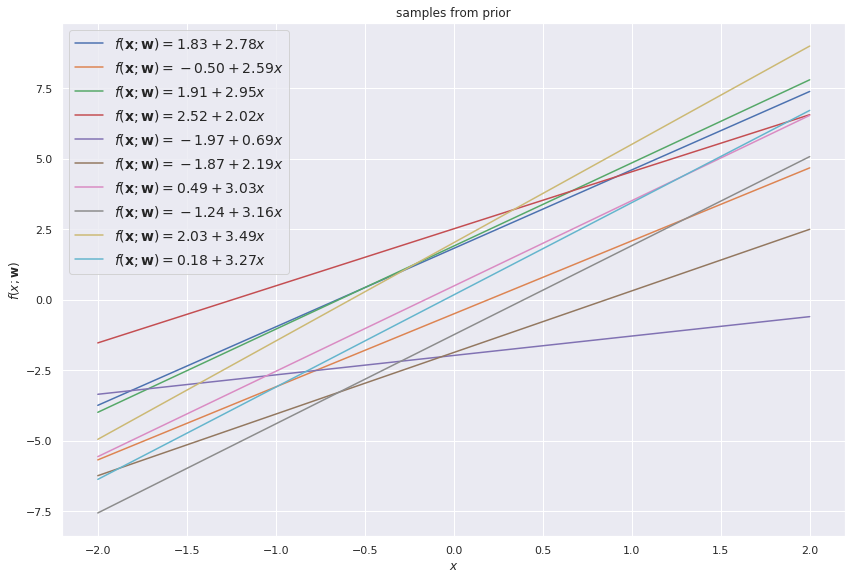

In [0]:
nsamples = 10 
plt.figure(figsize=(12, 8))
for i in range(nsamples):
  w_sample = np.random.multivariate_normal(mean = mean, cov = cov, size = 1)
  w_0 = w_sample[0, 0]
  w_1 = w_sample[0, 1]
  x = np.linspace(-2, 2, 100)

  plt.plot(x, w_0 + w_1*x, label='$f(\mathbf{x};\mathbf{w}) = %1.2f + %1.2fx$' % (w_0, w_1))
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')
plt.legend(loc='best', fontsize=14)
plt.tight_layout()
plt.title('samples from prior')

Define a function that accepts the prior precision $\alpha$ and the noise variance $\sigma^2$ and returns the posterior mean and covariance of $w$. 

In [0]:
import scipy.linalg
sigma = 1.0
def postmeanvar(X, Y, alpha, sigma):
    Phi = np.ndarray((len(X), d))
    for i in range(len(X)):
        Phi[i, :] = [1, X[i]]
    A = np.dot(Phi.T, Phi) / sigma ** 2. + alpha * np.eye(Phi.shape[1])
    L = scipy.linalg.cho_factor(A)
    m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y) / sigma ** 2)  # The posterior mean of w
    S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))           # The posterior covariance of w
    #print (Phi)
    #print (np.dot(Phi.T, Phi))
    return m, S

#print(postmeanvar(X, Y, alpha, sigma))
print("posterior mean of the weights:")
m = postmeanvar(X, Y, alpha, sigma)[0]
print(m)
print("posterior covariance of the weights:")
S = postmeanvar(X, Y, alpha, sigma)[1]
print(S)

posterior mean of the weights:
[-0.27226816  0.43326496]
posterior covariance of the weights:
[[0.0476899  0.00734859]
 [0.00734859 0.10383258]]


Visualize the posterior distribution over $w$ using scipy's ```multivariate_normal.pdf``` function. 

Text(0.5, 1.0, 'posterior distribution of weights')

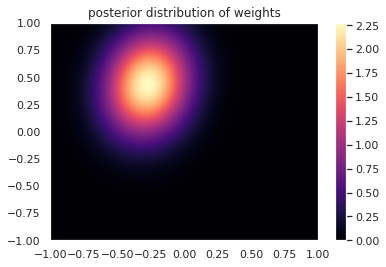

In [0]:
Pdfs = np.array([st.multivariate_normal.pdf(w, m.flatten(), S)for w in Wgrid[:,:,0]])
plt.contourf(W0, W1, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.title('posterior distribution of weights')

**How is the posterior different from the prior?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br>
The posterior has a more accurate distribution with less uncertainty than prior since it is updated using observation data. In other words, prior distribution covers a wide area of (w1, w2) space with relatively high probability, but posterior covariance leads to a better understanding of weights by assigning a high relative probability value at a smaller area of (w1, w2) surface. To sum up, the posterior distribution has a more accurate mean and less variance.
<br><br>

Plot some samples from the posterior distribution:

Text(0.5, 1, 'samples from posterior')

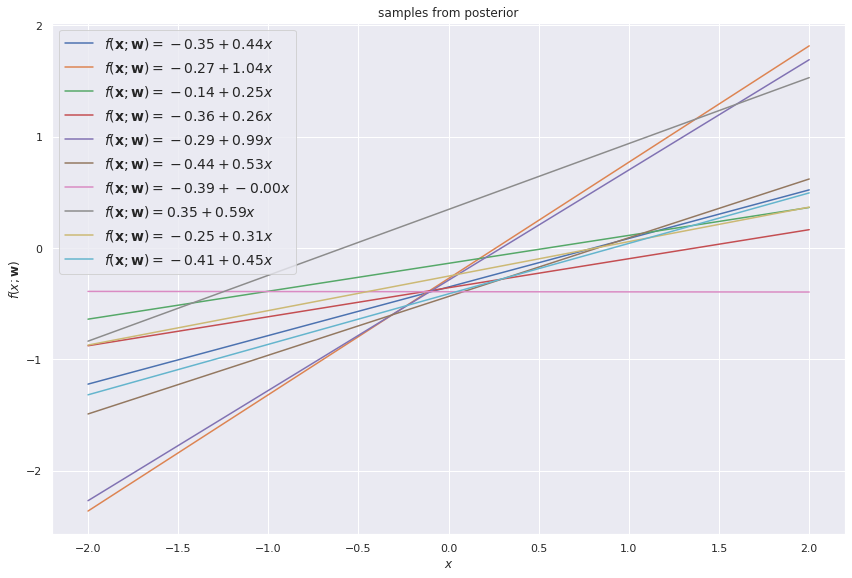

In [0]:
nsamples = 10 
plt.figure(figsize=(12, 8))
for i in range(nsamples):
  w_sample = np.random.multivariate_normal(mean = m, cov = S, size = 1)
  w_0 = w_sample[0, 0]
  w_1 = w_sample[0, 1]
  x = np.linspace(-2, 2, 100)

  plt.plot(x, w_0 + w_1*x, label='$f(\mathbf{x};\mathbf{w}) = %1.2f + %1.2fx$' % (w_0, w_1))
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')
plt.legend(loc='best', fontsize=14)
plt.tight_layout()
plt.title('samples from posterior')

Visualize the mean and variance of the posterior predictive distribution. Make sure to distinguish between 
measurement noise and epistemic uncertainty.

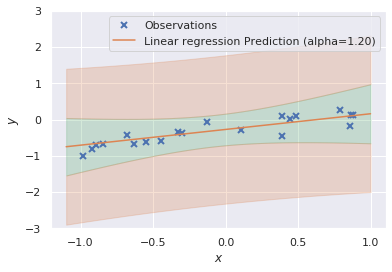

In [0]:
X_p = np.linspace(-1.1, 1, 100)[:, None]
Phi_p = np.ndarray((len(X_p), d))
for i in range(len(X_p)):
        Phi_p[i, :] = [1, X_p[i]]
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma ** 2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound

fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Linear regression Prediction (alpha=%1.2f)' % alpha)
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.25)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.25)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.ylim([-3, 3])
plt.legend(loc='best');

It is a good idea to set aside a part of your dataset for the purpose of testing the accuracy of your trained model. 
Consider the following test dataset:

In [0]:
import os
import io
import requests
import numpy as np
url="https://raw.githubusercontent.com/PredictiveScienceLab/uq-course/master/homeworks/hw3_data1_test.txt" 
s=requests.get(url).content 
testdata = np.loadtxt(io.StringIO(s.decode('utf-8')))
#testdata = np.loadtxt('hw3_data1_test.txt')
Xtest = testdata[0, :]
Ytest = testdata[1, :]

Make predictions on the test inputs, ```Xtest```, using the posterior predictive distribution under the Bayesian model. Compare it to the least squares predictions. Recall that the  least squares estimate of $\mathbf{w}$ is given by:
$$
\mathbf{w}_{\mathrm{LS}} = (\mathbf{\Phi}^T \mathbf{\Phi})^{-1} \mathbf{\Phi}^T y_{1:N}. 
$$
Use ```numpy.lstsq``` to obtain $\mathbf{w}_{\mathrm{LS}}$. The prediction at a new test location $x^*$ is given by $y^* = \mathbf{w}_{\mathrm{LS}, 0} + \mathbf{w}_{\mathrm{LS}, 1}x^*$.

L2 norm of least square deviation from true outputs:
0.6321303747756837
L2 norm of bayesian deviation from true outputs:
0.6864062810493593


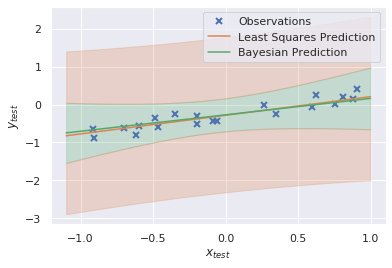

In [0]:
Phi = np.ndarray((len(X), d))
for i in range(len(X)):
    Phi[i, :] = [1, X[i]]

w_LS, res_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0:2]
X_p_test = np.linspace(-1.1, 1, 100)[:, None]
Phi_p_test = np.ndarray((len(X_p_test), d))
for i in range(len(X_p_test)):
        Phi_p_test[i, :] = [1, X_p_test[i]]

Phi_test = np.ndarray((len(Xtest), d))
for i in range(len(Xtest)):
        Phi_test[i, :] = [1, Xtest[i]]
 
Ypred_ls =  np.dot(Phi_p_test, w_LS)#least squares prediction.
Ypred_bayes = np.dot(Phi_p_test, m) #bayesian model prediction. 

V_p_ep_test = np.einsum('ij,jk,ik->i', Phi_p_test, S, Phi_p_test) # The epistemic uncertainty
S_p_ep_test = np.sqrt(V_p_ep_test)
V_p_test = V_p_ep_test + sigma ** 2 # Full uncertainty
S_p_test = np.sqrt(V_p_test)
Y_l_ep_test = Ypred_bayes - 2. * S_p_ep_test  # Lower epistemic predictive bound
Y_u_ep_test = Ypred_bayes + 2. * S_p_ep_test  # Upper epistemic predictive bound
Y_l_test = Ypred_bayes - 2. * S_p_test # Lower predictive bound
Y_u_test = Ypred_bayes + 2. * S_p_test # Upper predictive bound

fig, ax = plt.subplots()
ax.plot(Xtest, Ytest, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p_test, Ypred_ls, label='Least Squares Prediction')
ax.plot(X_p_test, Ypred_bayes, label='Bayesian Prediction')
ax.fill_between(X_p_test.flatten(), Y_l_ep_test, Y_u_ep_test, color=sns.color_palette()[2], alpha=0.25)
ax.fill_between(X_p_test.flatten(), Y_l_test, Y_l_ep_test, color=sns.color_palette()[1], alpha=0.25)
ax.fill_between(X_p_test.flatten(), Y_u_ep_test, Y_u_test, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x_{test}$')
ax.set_ylabel('$y_{test}$')
#plt.ylim([-3, 3])
plt.legend(loc='best');

#sigma_LS = np.sqrt(res_LS / Xtest.shape[0])
#print (sigma_LS)
print ("L2 norm of least square deviation from true outputs:")
print (np.linalg.norm(np.dot(Phi_test, w_LS)-Ytest))
print ("L2 norm of bayesian deviation from true outputs:")
print (np.linalg.norm(np.dot(Phi_test, m)-Ytest))

**Which model (Bayesian or least squares) offers better predictions? Why do you think that is?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br>
Generally speaking, Bayesian gives better results because LS does not consider any noise in the observed data and tries to fit a curve based on observed values only. On the other hand, Bayesian considers a normal distribution noise in the observed data and predicts the corresponding epistemic uncertainty, which leads to a prediction on possible deviation from predicted mean values. 
However, in this particlular dataset, the data has almost no noise, which is why LS does a better job according the deviation of predicted values from true outputs reported above.
<br><br>

**In what situations (if any) would you expect simple least squares regression to perform better than the Bayesian regression?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br>
As mentioned earlier, when there is no uncertainty in the observation data and model, LS can perform better since there is not really any noise in our observations, but we consider it in Bayesian predictions.

Also, Bayesian prediction relies on assigned priors and distributions, and wrong priors can affect the prediction accuracy, e.g the case where a Gaussian distribution is used to consider noise, but the noise is not really Gaussian and can be input dependent for instance. In that case, Bayesian prediction can lead to inaccurate values, especially in limited observation points.
<br><br>

## Part B

### Evidence approximation

Picking the hyperparameters $\alpha$ and $\sigma^2$ is tricky. In theory, the fully approach to modeling the uncertainty in the hyperparameters is  simple - put  priors on them and make predictions on test data by marginalizing wrt to the hyperparameters and model weights. In practice, the resulting integrals are intractable. A popular and easy to implement approach to hyperparameter selection is [cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)). The idea is to choose a set of hyperparameter values, train the model at each value in the set and test it predictive accuracy. Finally, you select the values of the hyperparameters that offer the best predictive capacity.

A more systematic approach is to maximize the model evidence. The evidence is the marginal likelihood  of the data conditional on the hyperparameters, i.e., $p(y|x, \alpha, \sigma^2)$. 
Under the Gaussian likelihood and isotropic Gaussian prior model, the log evidence is given by:
$$
log p(y|x, \alpha, \beta) = \frac{M}{2} \log \alpha + \frac{N}{2} \log \beta - E(\mathbf{m}) -\frac{1}{2} \log \mathrm{det}(A) - \frac{N}{2} \log 2\pi,
$$
where, 
$\beta$ is the inverse noise variance (or precision), 

$$A = \alpha \mathbf{I} + \beta \Phi^T \Phi,$$ $$\mathbf{m} = \beta A^{-1} \Phi^T y_{1:N},$$

and $M$ is the number of model parameters, which in this case is 2. 

The term $E(\mathbf{m})$ is a regularized misfit term given by:
$$
E(\mathbf{m}) = \frac{\beta}{2} \| y_{1:N} - \Phi \mathbf{m} \|_{2}^{2} + \frac{\alpha}{2} \| \mathbf{m} \|_{2}^{2}.
$$

Set up a function ```evidence``` that accepts the prior precision, $\alpha$ and the inverse noise variance, $\beta$, and returns the value of the evidence function. Feel free to parameterize your implementation of the ```evidence``` in whatever way you see fit.

In [0]:
parameter = np.zeros(2)
parameter[0] = alpha
parameter[1] = 1.0/sigma
def evidence(parameter):
    alpha = parameter[0]
    beta = parameter[1]
    M = 2
    N = X.shape[0]
    A = beta*np.dot(Phi.T, Phi) + alpha*np.eye(Phi.shape[1])
    L = scipy.linalg.cho_factor(A)
    m = scipy.linalg.cho_solve(L, beta*np.dot(Phi.T, Y))
    E = beta/2.0*(np.linalg.norm(Y-np.dot(Phi, m)))**2 + alpha/2.0*(np.linalg.norm(m))**2
    logp = M/2.0*np.log(alpha) + N/2.0*np.log(beta) - E - 0.5*np.log(np.linalg.det(A)) - N/2.0*np.log(2*np.pi)
    return logp
#print (evidence(parameter))

Use a suitable second order unconstrained optimization routine from ```scipy.optimize``` to minimize the **negative log evidence**. A popular method is the [BFGS algorithm.](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html). Be sure to read the documentation carefully.

In [0]:
from scipy.optimize import minimize
import math
x0=[1, 1]
result = minimize(lambda parameter:-(evidence(parameter)), x0,
 method='BFGS', options={'gtol': 1e-8, 'disp': True})

alpha = result.x[0]
beta = result.x[1]
print ('alpha=', alpha)
print ('beta=', beta)

Optimization terminated successfully.
         Current function value: -2.790188
         Iterations: 22
         Function evaluations: 92
         Gradient evaluations: 23
alpha= 6.309957593223958
beta= 34.641806310022695


Use the estimates of the hyperparameters obtained by maximizing the evidence to recompute the posterior mean and variance of the model parameters under the constant prior precision and likelihood variance model. 

In [0]:
sigma = np.sqrt(1.0/beta)
m = postmeanvar(X, Y, alpha, sigma)[0]
print(m)
print("posterior covariance of the weights:")
S = postmeanvar(X, Y, alpha, sigma)[1]
print(S)

[-0.28236864  0.48210469]
posterior covariance of the weights:
[[0.00144885 0.00024932]
 [0.00024932 0.00335362]]


**Does this differ from your earlier estimate of the posterior mean and variance?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br>
Yes, it is different. The alpha and beta (which determines sigma) are optimized values, while the former ones were obtained from try and error.<br><br>

**Visualize the following:** 
1.  The posterior density of $\mathbf{w}$.
2.  A few models sampled from the posterior. 
3.  The posterior predictive distribution  with noise variance and epistemic uncertainty.

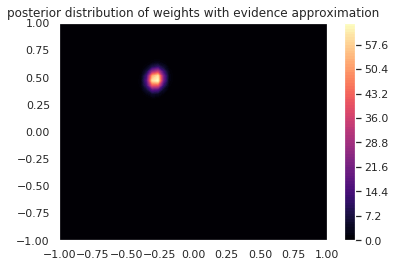

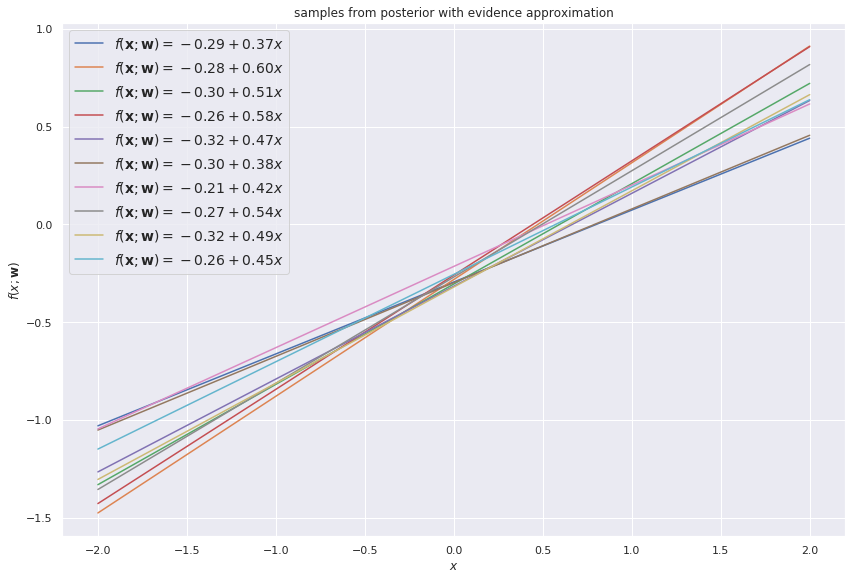

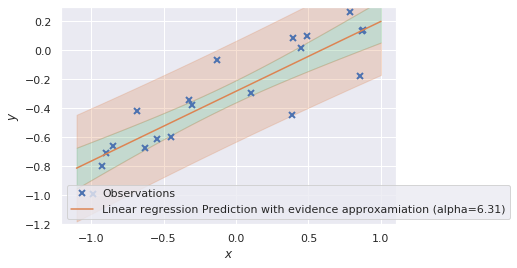

In [0]:
Pdfs = np.array([st.multivariate_normal.pdf(w, m.flatten(), S)for w in Wgrid[:,:,0]])
plt.contourf(W0, W1, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.title('posterior distribution of weights with evidence approximation')


nsamples = 10 
plt.figure(figsize=(12, 8))
for i in range(nsamples):
  w_sample = np.random.multivariate_normal(mean = m, cov = S, size = 1)
  w_0 = w_sample[0, 0]
  w_1 = w_sample[0, 1]
  x = np.linspace(-2, 2, 100)

  plt.plot(x, w_0 + w_1*x, label='$f(\mathbf{x};\mathbf{w}) = %1.2f + %1.2fx$' % (w_0, w_1))
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')
plt.legend(loc='best', fontsize=14)
plt.tight_layout()
plt.title('samples from posterior with evidence approximation')


X_p = np.linspace(-1.1, 1, 100)[:, None]
Phi_p = np.ndarray((len(X_p), d))
for i in range(len(X_p)):
        Phi_p[i, :] = [1, X_p[i]]
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma ** 2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound

fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Linear regression Prediction with evidence approxamiation (alpha=%1.2f)' % alpha)
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.25)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.25)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.ylim([-1.2, 0.3])
plt.legend(loc='best');

Finally, use the model you just trained to make predictions on the  test data:

L2 norm of least square deviation from true outputs:
0.6321303747756837
L2 norm of bayesian with evidence approximation deviation from true outputs:
0.6385426082152217


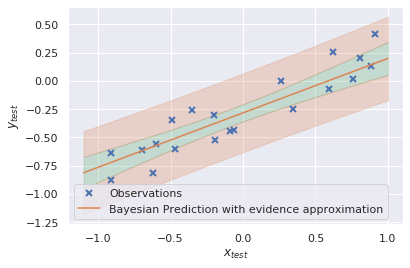

In [0]:
Ypred_ev = np.dot(Phi_p_test, m) #bayesian model with evidence approximation prediction. 

V_p_ep_test_ev = np.einsum('ij,jk,ik->i', Phi_p_test, S, Phi_p_test) # The epistemic uncertainty
S_p_ep_test_ev = np.sqrt(V_p_ep_test_ev)
V_p_test_ev = V_p_ep_test_ev + sigma ** 2 # Full uncertainty
S_p_test_ev = np.sqrt(V_p_test_ev)
Y_l_ep_test_ev = Ypred_ev - 2. * S_p_ep_test_ev  # Lower epistemic predictive bound
Y_u_ep_test_ev = Ypred_ev + 2. * S_p_ep_test_ev  # Upper epistemic predictive bound
Y_l_test_ev = Ypred_ev - 2. * S_p_test_ev # Lower predictive bound
Y_u_test_ev = Ypred_ev + 2. * S_p_test_ev # Upper predictive bound

fig, ax = plt.subplots()
ax.plot(Xtest, Ytest, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p_test, Ypred_ev, label='Bayesian Prediction with evidence approximation')
ax.fill_between(X_p_test.flatten(), Y_l_ep_test_ev, Y_u_ep_test_ev, color=sns.color_palette()[2], alpha=0.25)
ax.fill_between(X_p_test.flatten(), Y_l_test_ev, Y_l_ep_test_ev, color=sns.color_palette()[1], alpha=0.25)
ax.fill_between(X_p_test.flatten(), Y_u_ep_test_ev, Y_u_test_ev, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x_{test}$')
ax.set_ylabel('$y_{test}$')
#plt.ylim([-3, 3])
plt.legend(loc='best');

#sigma_LS = np.sqrt(res_LS / Xtest.shape[0])
#print (sigma_LS)
print ("L2 norm of least square deviation from true outputs:")
print (np.linalg.norm(np.dot(Phi_test, w_LS)-Ytest))
print ("L2 norm of bayesian with evidence approximation deviation from true outputs:")
print (np.linalg.norm(np.dot(Phi_test, m)-Ytest))

**How do the predictions compare to the previous versions?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br>
They both can predict model behavior well enough, but the epistemic uncertainty is clearly improved by exploiting evidence approximation for $\alpha$ and $\beta$ evaluation.
<br><br>

# Problem 5

### Bayesian linear regression  (Part 2)

We will now look at a somewhat more complicated example. The following dataset was generated using a molecular dynamics simulation of a plastic material (thanks to [Professor Alejandro Strachan](https://engineering.purdue.edu/MSE/people/ptProfile?id=33239) for sharing the data!).
In particular, we took a rectangular chunk of the material and we started applying tensile forces along one dimension.
What you see in the data set below is the instantaneous measurements of *strain* (percent enlogation of the material in the pulling direction) vs the normal *stress* (force per square area in MPa = $10^6 \text{N}/m^2$).
This [video](https://youtu.be/K6vOkQ5F9r0) will help you understand how the dataset was generated.

Text(0, 0.5, 'Stress $\\sigma$')

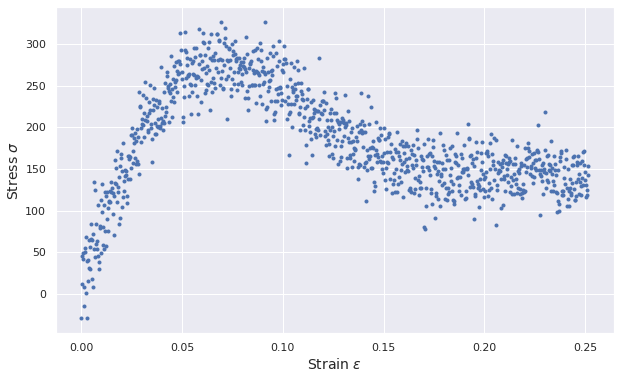

In [0]:
import os
import io
import requests
import numpy as np
url="https://raw.githubusercontent.com/PredictiveScienceLab/uq-course/master/homeworks/stress_strain.txt" 
s=requests.get(url).content 
data = np.loadtxt(io.StringIO(s.decode('utf-8')))
#data = np.loadtxt('stress_strain.txt')
epsilon = data[:, 0][:, None]
sigma = data[:, 1][:, None]
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(epsilon, sigma, '.')
ax.set_xlabel('Strain $\epsilon$', fontsize = 14)
ax.set_ylabel('Stress $\sigma$', fontsize = 14)

This is a noisy dataset.
We would like to process it in order to extract what is known as the [stress-strain curve](https://en.wikipedia.org/wiki/Stress–strain_curve) of the material.
The stress-strain curve characterizes the type of the material (the chemical bonds, the crystaline structure, any defects, etc.).
It is a required input to the equations of [elasticity](https://en.wikipedia.org/wiki/Elasticity_(physics)) otherwise known as a *constitutive relation*.

### Part A
The very first part of the stress-strain curve is very close to being linear.
It is called the *elastic regime*.
In that region, say $\epsilon < \epsilon_l=0.04$, the relationship between stress and strain is:
$$
\sigma(\epsilon) = E\epsilon.
$$
The constant $E$ is known as the *Young modulus* of the material.
Use a generalized linear model and Bayesian linear regression to:
+ Compute the posterior of $E$ given the data;
+ Visualize your epistemic and aleatory uncertainty about the stress-strain curve in the elastic regime;
+ Take five plaussible samples of the linear stress-strain curve and visualize them.

In your answer, you should first clearly describe your model in text using the notation of the lectures and then code the solution.

**Model Description:**

In the elastic (linear) region ($\epsilon<0.04$), a modified version of linear basis function is used which only contains $\Phi_2(x)=x$. This is chosen because of the elastic region stress-strain relation (Hooke's Law). For the regression part, the Automatic Relevance Determination (ARD) method is used, which assumes separate precision for each weight. In the elastic region only one weight is determined since we have one basic function.						


sigma ARD: 26.570417398698925
alpha ARD: [3.33343921e-08]
posterior of Young Modulus:
6445.8496780631


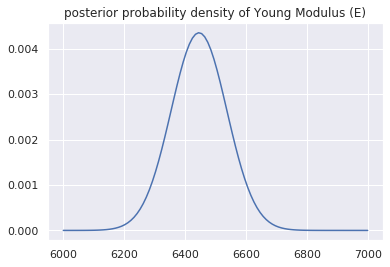

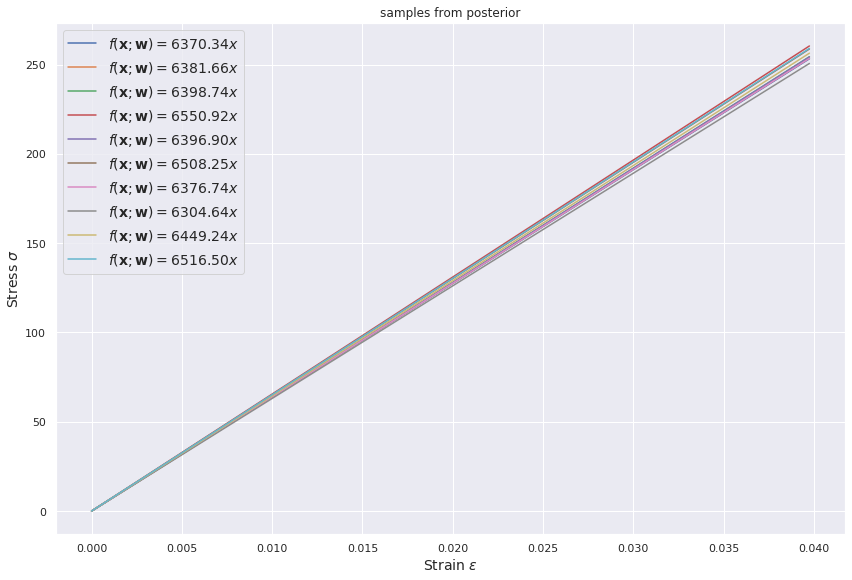

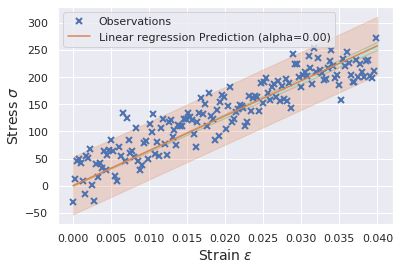

In [0]:
epsilon_l = 0.04
indices = np.where(epsilon < epsilon_l)
last_index = indices[0][-1]
epsilon_linear = data[:last_index+1, 0]
sigma_linear = data[:last_index+1, 1]
#print (last_index)
#print (indices[0][-1])
#print (epsilon_linear[-1])


#w = np.linspace(-1, 1, 50)
#W0, W1 = np.meshgrid(w, w)
#Wgrid = np.hstack([W0.flatten()[:, None], W1.flatten()[:, None]])[:, :, None]
d = 1
#mean = np.zeros(d)
#alpha = 1.2
#cov = 1/alpha*np.eye(d)

X = epsilon_linear
Y = sigma_linear

#print (mean)
#print (cov)

import scipy.linalg
from sklearn.linear_model import ARDRegression

regressor = ARDRegression()
Phi = np.ndarray((len(X), d))
for i in range(len(X)):
    Phi[i, :] = [X[i]]
regressor.fit(Phi, Y)
sigma = np.sqrt(1. / regressor.alpha_)
print ('sigma ARD:', sigma)
alpha = regressor.lambda_
print ('alpha ARD:', alpha)

#sigma = 1.0
def postmeanvar(X, Y, alpha, sigma):
    Phi = np.ndarray((len(X), d))
    for i in range(len(X)):
        Phi[i, :] = [X[i]]
    A = np.dot(Phi.T, Phi) / sigma ** 2. + alpha * np.eye(Phi.shape[1])
    L = scipy.linalg.cho_factor(A)
    m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y) / sigma ** 2)  # The posterior mean of w
    S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))           # The posterior covariance of w
    #print (Phi)
    #print (np.dot(Phi.T, Phi))
    return m, S

#print(postmeanvar(X, Y, alpha, sigma))
print("posterior of Young Modulus:")
m = postmeanvar(X, Y, alpha, sigma)[0]
print(m[0])
#print("posterior covariance of the weights:")
S = postmeanvar(X, Y, alpha, sigma)[1]
#print(S[0,0])

fig, ax2 = plt.subplots()
w = np.linspace(6000,7000, 100)
ax2.plot(w, st.norm(loc=m[0], scale=np.sqrt(S[0,0])).pdf(w), label='Posterior PDF of weights')
#ax.set_xlabel('$E$')
#ax.set_ylabel('$pdf(E)$')
ax2.set_title('posterior probability density of Young Modulus (E)')


nsamples = 10 
plt.figure(figsize=(12, 8))
for i in range(nsamples):
  w_sample = np.random.multivariate_normal(mean = m, cov = S, size = 1)
  #w_0 = w_sample[0, 0]
  w_1 = w_sample[0, 0]
  #x = np.linspace(-2, 2, 100)

  plt.plot(X, w_1*X, label='$f(\mathbf{x};\mathbf{w}) = %1.2fx$' % (w_1))
plt.xlabel('Strain $\epsilon$', fontsize = 14)
plt.ylabel('Stress $\sigma$', fontsize = 14)
plt.legend(loc='best', fontsize=14)
plt.tight_layout()
plt.title('samples from posterior')


X_p_linear = np.linspace(0, 0.04, 100)[:, None]
Phi_p = np.ndarray((len(X_p_linear), d))
for i in range(len(X_p_linear)):
        Phi_p[i, :] = [X_p_linear[i]]
Y_p_linear = np.dot(Phi_p, m) # The mean prediction
V_p_ep_linear = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep_linear = np.sqrt(V_p_ep_linear)
V_p_linear = V_p_ep_linear + sigma ** 2 # Full uncertainty
S_p_linear = np.sqrt(V_p_linear)
Y_l_ep_linear = Y_p_linear - 2. * S_p_ep_linear  # Lower epistemic predictive bound
Y_u_ep_linear = Y_p_linear + 2. * S_p_ep_linear  # Upper epistemic predictive bound
Y_l_linear = Y_p_linear - 2. * S_p_linear # Lower predictive bound
Y_u_linear = Y_p_linear + 2. * S_p_linear # Upper predictive bound

fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p_linear, Y_p_linear, label='Linear regression Prediction (alpha=%1.2f)' % alpha)
ax.fill_between(X_p_linear.flatten(), Y_l_ep_linear, Y_u_ep_linear, color=sns.color_palette()[2], alpha=0.25)
ax.fill_between(X_p_linear.flatten(), Y_l_linear, Y_l_ep_linear, color=sns.color_palette()[1], alpha=0.25)
ax.fill_between(X_p_linear.flatten(), Y_u_ep_linear, Y_u_linear, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('Strain $\epsilon$', fontsize = 14)
ax.set_ylabel('Stress $\sigma$', fontsize = 14)
#plt.ylim([-3, 3])
plt.legend(loc='best');

### Part B
Now, come up with a generalized linear model that can capture the non-linear part of the stress-strain relation.
Remember, you can use any model you want as soon as:
+ it is linear in the parameters to be estimated,
+ it clearly has a well-defined elastic regime (see Part A).

Use your model to:
+ Derive, compute, and visualize a probabilistic estimate of the peak of the stress-strain curve (the so-called *yield stress*). This is not necessarily going to be Gaussian or even analytically available;
+ Visualize your epistemic and aleatory uncertainty about the stress-strain curve.
+ Take five plaussible samples of the linear stress-strain curve and visualize them.

In your answer, you should first clearly describe your model in text using the notation of the lectures and then code the solution.

*Hint: You can use the Heavide step function to turn on or off models for various ranges of $\epsilon$. The idea is quite simple. Here is a model that has the right form in the elastic regime and an arbitrary form in the non-linear regime:*
$$
f(\epsilon) = E\epsilon \left[(1 - H(\epsilon - \epsilon_l)\right] + g(\epsilon;\mathbf{w}_g)H(\epsilon - \epsilon_l),
$$
where
$$
H(x) = \begin{cases}
0,\;\text{if}\;x < 0\\
1,\;\text{otherwise}.
\end{cases}
$$

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br>
In the plastic region ($\epsilon\geq0.04$), polynomial basis functions (up to degree 7) are used. In this region, the ARD method is used for the regression process and weights evaluation and generates 8 values.

In [0]:
class RadialBasisFunctions(object):
    """
    A set of linear basis functions.
    
    Arguments:
    X   -  The centers of the radial basis functions.
    ell -  The assumed lengthscale.
    """
    def __init__(self, X, ell):
        self.X = X
        self.ell = ell
        self.num_basis = X.shape[0]
    def __call__(self, x):
        return np.exp(-.5 * (x - self.X) ** 2 / self.ell ** 2).flatten()


class PolynomialBasis(object):
    """
    A set of linear basis functions.
    
    Arguments:
    degree  -  The degree of the polynomial.
    """
    def __init__(self, degree):
        self.degree = degree
        self.num_basis = degree + 1
    def __call__(self, x):
        #ali = np.array([x[0] ** i for i in range(0, self.degree + 1)])
        #ali[0] = 0
        #ali[1] = 0
        #return ali
        return np.array([x[0] ** i for i in range(self.degree + 1)])

In [0]:
def compute_design_matrix(X, phi):
    """
    Arguments:
    
    X   -  The observed inputs (1D array)
    phi -  The basis functions.
    """
    num_observations = X.shape[0]
    num_basis = phi.num_basis
    Phi = np.ndarray((num_observations, num_basis))
    for i in range(num_observations):
        Phi[i, :] = phi(X[i,:])
    return Phi

In [0]:
epsilon_nonlinear = data[last_index:, 0]
sigma_nonlinear = data[last_index:, 1]

import scipy.linalg
from sklearn.linear_model import ARDRegression


X = epsilon_nonlinear[:, None]
#print (X)
Y = sigma_nonlinear

#polynomial
degree = 7
phi = PolynomialBasis(degree)
Phi = compute_design_matrix(X, phi)
X_p_nonlinear = np.linspace(0.04, 0.25, 100)[:, None]

#radial
#ell = 2.
#Xc = np.linspace(epsilon_nonlinear[0], epsilon_nonlinear[-1], 10)
#phi = RadialBasisFunctions(Xc, ell)
#Phi = compute_design_matrix(X, phi)

regressor = ARDRegression()
regressor.fit(Phi, Y)
sigma = np.sqrt(1. / regressor.alpha_)
print ('sigma ARD:', sigma)
alpha = regressor.lambda_
print ('alpha ARD:', alpha)

#sigma = 1.0
def postmeanvar(X, Y, alpha, sigma):
    #radial 
    #ell = 2.
    #Xc = np.linspace(epsilon_nonlinear[0], epsilon_nonlinear[-1], 10)
    #phi = RadialBasisFunctions(Xc, ell)
    #Phi = compute_design_matrix(X, phi)

    #polynomial
    degree = 7
    phi = PolynomialBasis(degree)
    Phi_p = compute_design_matrix(X_p_nonlinear, phi)

    A = np.dot(Phi.T, Phi) / sigma ** 2. + alpha * np.eye(Phi.shape[1])
    L = scipy.linalg.cho_factor(A)
    m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y) / sigma ** 2)  # The posterior mean of w
    S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))           # The posterior covariance of w
    
    return m, S

sigma ARD: 23.525182764635748
alpha ARD: [1.00000000e+00 5.25619405e-09 3.53634352e-11 1.71315743e-12
 7.05149886e-13 9.99999979e-01 1.00000012e+00 1.00000004e+00]


[-1.71867585e-01  1.03680227e+04 -1.28368147e+05  5.76722714e+05
 -8.81073776e+05 -6.06324332e-06 -4.33194512e-06 -1.98101962e-06]
[-1.71867585e-01  1.03680227e+04 -1.28368147e+05  5.76722714e+05
 -8.81073776e+05 -6.06324332e-06 -4.33194512e-06 -1.98101962e-06]


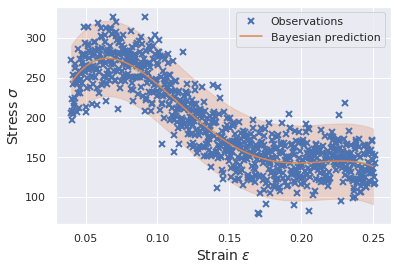

In [0]:
#print (np.array([0.04]))
#print (phi([0.04]))
#print (compute_design_matrix(np.array([0.04]), phi))
#Phi_test = compute_design_matrix(X, phi)
#print (Phi_test)

m = postmeanvar(X, Y, alpha, sigma)[0]
print(m)
#m[0] = -1.38335175e+02
#m[1] = 1.41725866e+04
#m[0] = 0
#m[1] = 0
print(m)
#print("posterior covariance of the weights:")
S = postmeanvar(X, Y, alpha, sigma)[1]

X_p_nonlinear = np.linspace(0.04, 0.25, 100)[:, None]
Phi_p = compute_design_matrix(X_p_nonlinear, phi)
Y_p_nonlinear = np.dot(Phi_p, m) # The mean prediction
V_p_ep_nonlinear = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep_nonlinear = np.sqrt(V_p_ep_nonlinear)
V_p_nonlinear = V_p_ep_nonlinear + sigma ** 2 # Full uncertainty
S_p_nonlinear = np.sqrt(V_p_nonlinear)
Y_l_ep_nonlinear = Y_p_nonlinear - 2. * S_p_ep_nonlinear  # Lower epistemic predictive bound
Y_u_ep_nonlinear = Y_p_nonlinear + 2. * S_p_ep_nonlinear  # Upper epistemic predictive bound
Y_l_nonlinear = Y_p_nonlinear - 2. * S_p_nonlinear # Lower predictive bound
Y_u_nonlinear = Y_p_nonlinear + 2. * S_p_nonlinear # Upper predictive bound

fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p_nonlinear, Y_p_nonlinear, label='Bayesian prediction')
ax.fill_between(X_p_nonlinear.flatten(), Y_l_ep_nonlinear, Y_u_ep_nonlinear, color=sns.color_palette()[2], alpha=0.25)
ax.fill_between(X_p_nonlinear.flatten(), Y_l_nonlinear, Y_l_ep_nonlinear, color=sns.color_palette()[1], alpha=0.25)
ax.fill_between(X_p_nonlinear.flatten(), Y_u_ep_nonlinear, Y_u_nonlinear, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('Strain $\epsilon$', fontsize = 14)
ax.set_ylabel('Stress $\sigma$', fontsize = 14)
#plt.ylim([-3, 3])
plt.legend(loc='best');

In [0]:
import copy
#print (m)
weights = copy.deepcopy(m) 
#weights = m
sum = 0
for i in range(0, len(m)):
  sum = sum + m[i]*epsilon_l**i
print (sum)

sum2 = 0
for i in range(0, len(m)):
  sum2 = sum2 + i*m[i]*epsilon_l**i
print (sum2)

sum4 = 0
for i in range(2, len(m)):
  sum4 = sum4 + i*m[i]*epsilon_l**(i-1)
weights[1] = 6445.849 - sum4
#print (weights[1])

sum3 = 0
for i in range(2, len(m)):
  sum3 = sum3 + (i-1)*m[i]*epsilon_l**i
weights[0] = sum3 
#print (weights[0])

sum6 = 0
for i in range(0, len(m)):
  sum6 = sum6 + weights[i]*epsilon_l**i

sum7 = 0
for i in range(0, len(m)):
  sum7 = sum7 + i*weights[i]*epsilon_l**(i-1)
print (sum6)
print (sum7)
print (m)
print (weights)

243.814707947006
105.65140077857818
257.83396
6445.849000000001
[-1.71867585e-01  1.03680227e+04 -1.28368147e+05  5.76722714e+05
 -8.81073776e+05 -6.06324332e-06 -4.33194512e-06 -1.98101962e-06]
[-1.38335175e+02  1.41725866e+04 -1.28368147e+05  5.76722714e+05
 -8.81073776e+05 -6.06324332e-06 -4.33194512e-06 -1.98101962e-06]


Text(0.5, 1, 'samples from posterior')

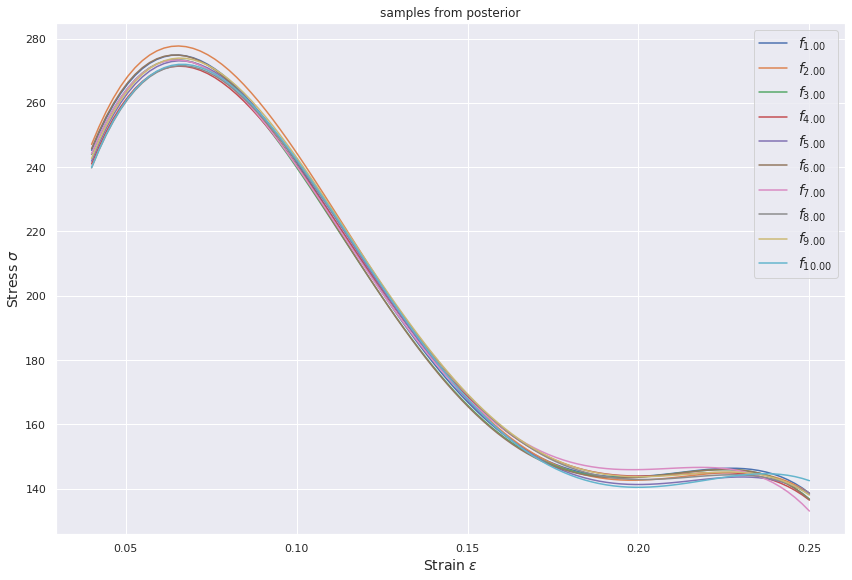

In [0]:
import math
nsamples = 10 
plt.figure(figsize=(12, 8))
#Yield_stress = []
for i in range(nsamples):
  w_sample = np.random.multivariate_normal(mean = m, cov = S, size = 1)
  #w_0 = w_sample[0, 0]
  #w_1 = w_sample[0, 0]
  #x = np.linspace(-2, 2, 100)
  Phi_p = compute_design_matrix(X_p_nonlinear, phi)
  Y_p_nonlinear = np.dot(Phi_p, w_sample.T)
  #Yield_stress.append(np.max(Y_p))

  #plt.plot(X_p, Y_p, label='$f(\mathbf{x};\mathbf{w}) = %1.2fx$' % (w_1))
  plt.plot(X_p_nonlinear, Y_p_nonlinear, label='$f_{%1.2f}$' %int(float(i+1))) 
plt.xlabel('Strain $\epsilon$', fontsize = 14)
plt.ylabel('Stress $\sigma$', fontsize = 14)
plt.legend(loc='best', fontsize=14)
plt.tight_layout()
plt.title('samples from posterior')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(0, 0.5, 'Probability of occurance')

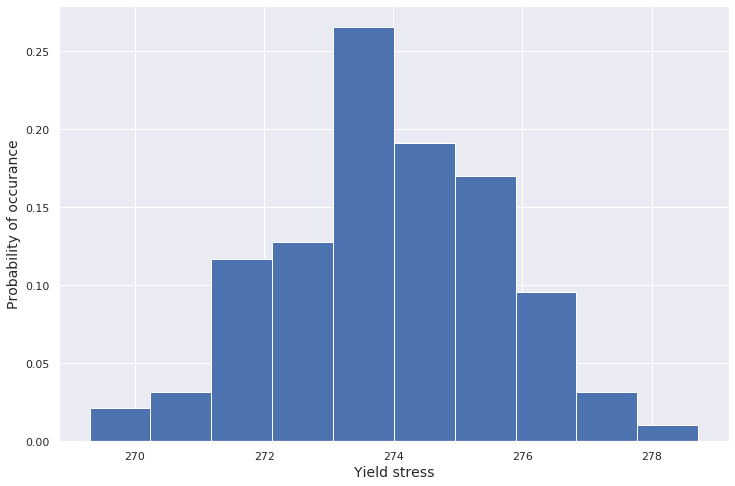

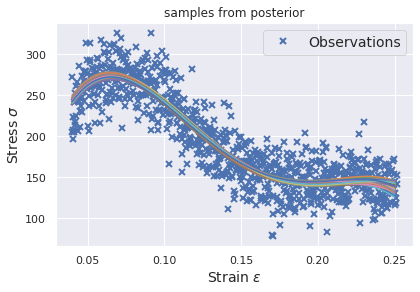

In [0]:
import math
nsamples = 100 
plt.figure(figsize=(12, 8))
Yield_stress = []
plt.figure(0)
plt.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
for i in range(nsamples):
  w_sample = np.random.multivariate_normal(mean = m, cov = S, size = 1)
  #w_0 = w_sample[0, 0]
  #w_1 = w_sample[0, 0]
  #x = np.linspace(-2, 2, 100)
  Phi_p = compute_design_matrix(X_p_nonlinear, phi)
  Y_p_nonlinear = np.dot(Phi_p, w_sample.T)
  Yield_stress.append(np.max(Y_p_nonlinear))

  #plt.plot(X_p, Y_p, label='$f(\mathbf{x};\mathbf{w}) = %1.2fx$' % (w_1))
  plt.figure(0)
  #plt.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
  plt.plot(X_p_nonlinear, Y_p_nonlinear)  
plt.xlabel('Strain $\epsilon$', fontsize = 14)
plt.ylabel('Stress $\sigma$', fontsize = 14)
plt.legend(loc='best', fontsize=14)
plt.tight_layout()
plt.title('samples from posterior')

plt.figure(1)
plt.hist(np.array(Yield_stress),bins=10,normed=True);
plt.xlabel('Yield stress', fontsize = 14)
plt.ylabel('Probability of occurance', fontsize = 14)

In [0]:
def Heavide_step(x, xc):
  value = np.ones(x.shape[0])
  indices = np.where(x < xc)
  value[indices[0]] = 0
  return value
#print (Heavide_step(epsilon, epsilon_l))
#plt.plot(epsilon, Heavide_step(epsilon, epsilon_l))

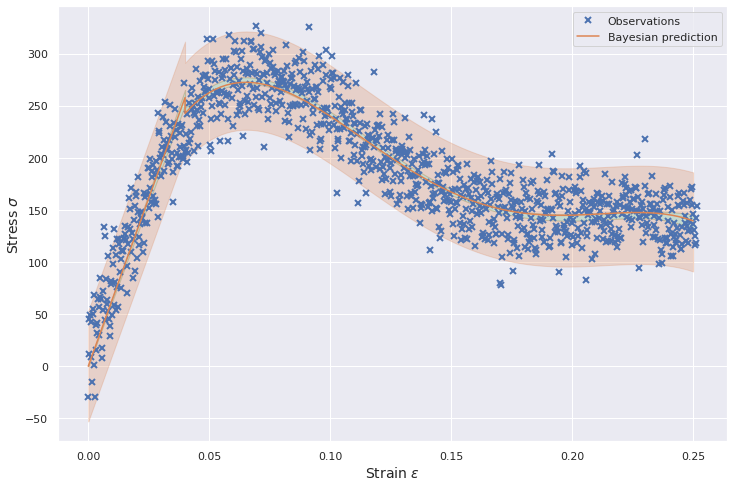

In [0]:
temp = np.zeros(len(Y_p_nonlinear))
for i in range(0, len(Y_p_nonlinear)):
  temp[i] = Y_p_nonlinear[i][0]
#print (Y_p_linear)
Y_total = np.concatenate([Y_p_linear, temp])


#temp1 = np.zeros(len(Y_l_ep_nonlinear))
#for i in range(0, len(Y_l_ep_nonlinear)):
#  temp1[i] = Y_l_ep_nonlinear[i][0]
#Y_l_ep_nonlinear = temp1

#temp2 = np.zeros(len(Y_l_ep_linear))
#for i in range(0, len(Y_l_ep_linear)):
#  temp2[i] = Y_l_ep_linear[i][0]
#Y_l_ep_linear = temp2

Y_l_ep_total = np.concatenate([Y_l_ep_linear, Y_l_ep_nonlinear])



#temp3 = np.zeros(len(Y_u_ep_nonlinear))
#for i in range(0, len(Y_u_ep_nonlinear)):
#  temp3[i] = Y_u_ep_nonlinear[i][0]
#Y_u_ep_nonlinear = temp3

#temp4 = np.zeros(len(Y_u_ep_linear))
#for i in range(0, len(Y_u_ep_linear)):
#  temp4[i] = Y_u_ep_linear[i][0]
#Y_u_ep_linear = temp4

Y_u_ep_total = np.concatenate([Y_u_ep_linear, Y_u_ep_nonlinear])


#temp5 = np.zeros(len(Y_l_nonlinear))
#for i in range(0, len(Y_l_nonlinear)):
#  temp5[i] = Y_l_nonlinear[i][0]
#Y_l_nonlinear = temp5

#temp6 = np.zeros(len(Y_l_linear))
#for i in range(0, len(Y_l_linear)):
#  temp6[i] = Y_l_linear[i][0]
#Y_l_linear = temp6

Y_l_total = np.concatenate([Y_l_linear, Y_l_nonlinear])



#temp7 = np.zeros(len(Y_u_nonlinear))
#for i in range(0, len(Y_u_nonlinear)):
#  temp7[i] = Y_u_nonlinear[i][0]
#Y_u_nonlinear = temp7

#temp8 = np.zeros(len(Y_u_linear))
#for i in range(0, len(Y_u_linear)):
#  temp8[i] = Y_u_linear[i][0]
#Y_u_linear = temp8

Y_u_total = np.concatenate([Y_u_linear, Y_u_nonlinear])


temp9 = np.zeros(len(X_p_nonlinear))
for i in range(0, len(X_p_nonlinear)):
  temp9[i] = X_p_nonlinear[i][0]
#X_p_nonlinear = temp9

temp0 = np.zeros(len(X_p_linear))
for i in range(0, len(X_p_linear)):
  temp0[i] = X_p_linear[i][0]
#X_p_linear = temp0

X_total = np.concatenate([temp0, temp9])


fig , ax = plt.subplots(1,1,figsize = (12,8))
#fig, ax = plt.subplots()
ax.plot(data[:, 0][:, None], data[:, 1][:, None], 'x', markeredgewidth=2, label='Observations')
ax.plot(X_total, Y_total, label='Bayesian prediction')
ax.fill_between(X_total.flatten(), Y_l_ep_total, Y_u_ep_total, color=sns.color_palette()[2], alpha=0.25)
ax.fill_between(X_total.flatten(), Y_l_total, Y_l_ep_total, color=sns.color_palette()[1], alpha=0.25)
ax.fill_between(X_total.flatten(), Y_u_ep_total, Y_u_total, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('Strain $\epsilon$', fontsize = 14)
ax.set_ylabel('Stress $\sigma$', fontsize = 14)
#plt.ylim([-3, 3])
plt.legend(loc='best');

### Part C

The model you constructed in part B may have a disctontinuity at $\epsilon=\epsilon_l$.
How can you enforce continuity of $\sigma(\epsilon)$ and its first derivative at that point?
Can you reparameterize the model of part B, so that this condition is automatically satisfied?
If yes, then repeat the analysis of part B.

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br>
Using the continuity and diffrentiability constraints, w0 and w1 have been eliminated, and new basis functions have been obtained, which are implemented in the polynimalbasis_modified class as shown below. The rest of the procedure is similar to the previous section.

In [0]:
class RadialBasisFunctions(object):
    """
    A set of linear basis functions.
    
    Arguments:
    X   -  The centers of the radial basis functions.
    ell -  The assumed lengthscale.
    """
    def __init__(self, X, ell):
        self.X = X
        self.ell = ell
        self.num_basis = X.shape[0]
    def __call__(self, x):
        return np.exp(-.5 * (x - self.X) ** 2 / self.ell ** 2).flatten()


class PolynomialBasis_modified(object):
    """
    A set of linear basis functions.
    
    Arguments:
    degree  -  The degree of the polynomial.
    """
    def __init__(self, degree):
        self.degree = degree
        self.num_basis = degree + 1
    def __call__(self, x):
        #ali = np.array([x[0] ** i for i in range(0, self.degree + 1)])
        ali = np.zeros(self.degree+1)
        epsilon_l = 0.04
        #E = 6445.8496780631
        ali[0] = 1
        ali[1] = x[0]
        for i in range(2, self.degree + 1):
          ali[i] = (i-1)*epsilon_l**i + x[0]**i - i*x[0]*epsilon_l**(i-1) 
        return ali
        #return np.array([x[0] ** i for i in range(self.degree + 1)])

In [0]:
def compute_design_matrix(X, phi):
    """
    Arguments:
    
    X   -  The observed inputs (1D array)
    phi -  The basis functions.
    """
    num_observations = X.shape[0]
    num_basis = phi.num_basis
    Phi = np.ndarray((num_observations, num_basis))
    for i in range(num_observations):
        Phi[i, :] = phi(X[i,:])
    return Phi

In [0]:
epsilon_nonlinear = data[last_index-1:, 0]
sigma_nonlinear = data[last_index-1:, 1]

import scipy.linalg
from sklearn.linear_model import ARDRegression


X = epsilon_nonlinear[:, None]
#print (X)
Y = sigma_nonlinear

#polynomial
degree = 7
phi = PolynomialBasis_modified(degree)
Phi = compute_design_matrix(X, phi)
X_p_nonlinear = np.linspace(0.04, 0.25, 100)[:, None]

#radial
#ell = 2.
#Xc = np.linspace(epsilon_nonlinear[0], epsilon_nonlinear[-1], 10)
#phi = RadialBasisFunctions(Xc, ell)
#Phi = compute_design_matrix(X, phi)

regressor = ARDRegression()
regressor.fit(Phi, Y)
sigma = np.sqrt(1. / regressor.alpha_)
print ('sigma ARD:', sigma)
alpha = regressor.lambda_
print ('alpha ARD:', alpha)

#sigma = 1.0
def postmeanvar(X, Y, alpha, sigma):
    #radial 
    #ell = 2.
    #Xc = np.linspace(epsilon_nonlinear[0], epsilon_nonlinear[-1], 10)
    #phi = RadialBasisFunctions(Xc, ell)
    #Phi = compute_design_matrix(X, phi)

    #polynomial
    degree = 7
    phi = PolynomialBasis_modified(degree)
    Phi_p = compute_design_matrix(X_p_nonlinear, phi)

    A = np.dot(Phi.T, Phi) / sigma ** 2. + alpha * np.eye(Phi.shape[1])
    L = scipy.linalg.cho_factor(A)
    m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y) / sigma ** 2)  # The posterior mean of w
    S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))           # The posterior covariance of w
    
    return m, S

sigma ARD: 23.45407731759547
alpha ARD: [1.00000000e+00 7.17141589e-08 3.50534016e-11 1.69455336e-12
 6.98378610e-13 1.00000007e+00 1.00000015e+00 1.00000005e+00]


[ 4.92339871e+01  5.20435438e+03 -2.20601083e+05  1.00707684e+06
 -1.58492224e+06  3.43263226e-06  3.14372391e-06  1.63376448e-06]


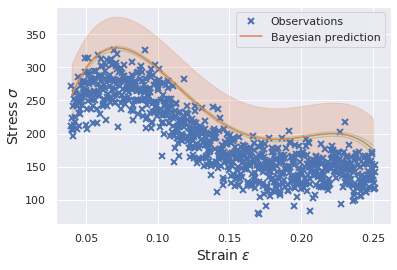

In [0]:
#print (np.array([0.04]))
#print (phi([0.04]))
#print (compute_design_matrix(np.array([0.04]), phi))
#Phi_test = compute_design_matrix(X, phi)
#print (Phi_test)

m = postmeanvar(X, Y, alpha, sigma)[0]
#print(m)
#m[0] = -1.38335175e+02
m[0] =  Y_p_linear[-1] - 208.6
#m[1] = 1.41725866e+04
#m[1] = 6445.8496780631
#m[0] = 0
#m[1] = 0
print(m)
#print (Y_p_nonlinear[0])
#print("posterior covariance of the weights:")
S = postmeanvar(X, Y, alpha, sigma)[1]

X_p_nonlinear = np.linspace(0.04, 0.25, 100)[:, None]
Phi_p = compute_design_matrix(X_p_nonlinear, phi)
Y_p_nonlinear = np.dot(Phi_p, m) # The mean prediction
#print (Y_p_nonlinear[0])
V_p_ep_nonlinear = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep_nonlinear = np.sqrt(V_p_ep_nonlinear)
V_p_nonlinear = V_p_ep_nonlinear + sigma ** 2 # Full uncertainty
S_p_nonlinear = np.sqrt(V_p_nonlinear)
Y_l_ep_nonlinear = Y_p_nonlinear - 2. * S_p_ep_nonlinear  # Lower epistemic predictive bound
Y_u_ep_nonlinear = Y_p_nonlinear + 2. * S_p_ep_nonlinear  # Upper epistemic predictive bound
Y_l_nonlinear = Y_p_nonlinear - 2. * S_p_nonlinear # Lower predictive bound
Y_u_nonlinear = Y_p_nonlinear + 2. * S_p_nonlinear # Upper predictive bound

fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p_nonlinear, Y_p_nonlinear, label='Bayesian prediction')
ax.fill_between(X_p_nonlinear.flatten(), Y_l_ep_nonlinear, Y_u_ep_nonlinear, color=sns.color_palette()[2], alpha=0.25)
ax.fill_between(X_p_nonlinear.flatten(), Y_l_nonlinear, Y_l_ep_nonlinear, color=sns.color_palette()[1], alpha=0.25)
ax.fill_between(X_p_nonlinear.flatten(), Y_u_ep_nonlinear, Y_u_nonlinear, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('Strain $\epsilon$', fontsize = 14)
ax.set_ylabel('Stress $\sigma$', fontsize = 14)
#plt.ylim([-3, 3])
plt.legend(loc='best');

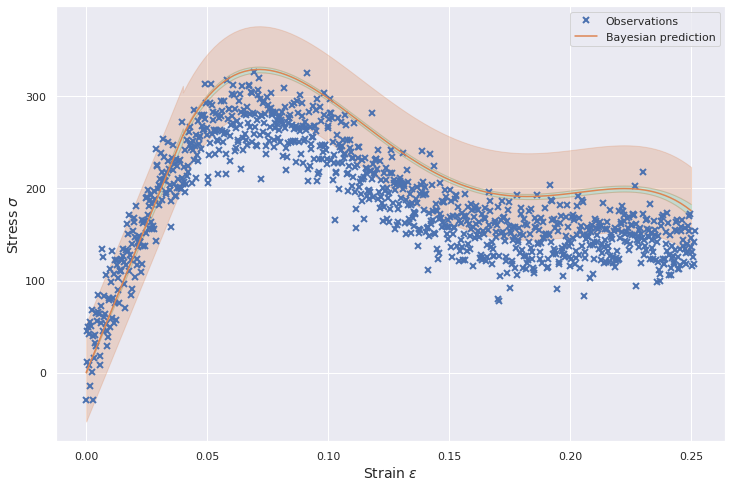

In [0]:
#temp = np.zeros(len(Y_p_nonlinear))
#for i in range(0, len(Y_p_nonlinear)):
  #temp[i] = Y_p_nonlinear[i][0]
#print (Y_p_linear)
Y_total = np.concatenate([Y_p_linear, Y_p_nonlinear])


#temp1 = np.zeros(len(Y_l_ep_nonlinear))
#for i in range(0, len(Y_l_ep_nonlinear)):
#  temp1[i] = Y_l_ep_nonlinear[i][0]
#Y_l_ep_nonlinear = temp1

#temp2 = np.zeros(len(Y_l_ep_linear))
#for i in range(0, len(Y_l_ep_linear)):
#  temp2[i] = Y_l_ep_linear[i][0]
#Y_l_ep_linear = temp2

Y_l_ep_total = np.concatenate([Y_l_ep_linear, Y_l_ep_nonlinear])



#temp3 = np.zeros(len(Y_u_ep_nonlinear))
#for i in range(0, len(Y_u_ep_nonlinear)):
#  temp3[i] = Y_u_ep_nonlinear[i][0]
#Y_u_ep_nonlinear = temp3

#temp4 = np.zeros(len(Y_u_ep_linear))
#for i in range(0, len(Y_u_ep_linear)):
#  temp4[i] = Y_u_ep_linear[i][0]
#Y_u_ep_linear = temp4

Y_u_ep_total = np.concatenate([Y_u_ep_linear, Y_u_ep_nonlinear])


#temp5 = np.zeros(len(Y_l_nonlinear))
#for i in range(0, len(Y_l_nonlinear)):
#  temp5[i] = Y_l_nonlinear[i][0]
#Y_l_nonlinear = temp5

#temp6 = np.zeros(len(Y_l_linear))
#for i in range(0, len(Y_l_linear)):
#  temp6[i] = Y_l_linear[i][0]
#Y_l_linear = temp6

Y_l_total = np.concatenate([Y_l_linear, Y_l_nonlinear])



#temp7 = np.zeros(len(Y_u_nonlinear))
#for i in range(0, len(Y_u_nonlinear)):
#  temp7[i] = Y_u_nonlinear[i][0]
#Y_u_nonlinear = temp7

#temp8 = np.zeros(len(Y_u_linear))
#for i in range(0, len(Y_u_linear)):
#  temp8[i] = Y_u_linear[i][0]
#Y_u_linear = temp8

Y_u_total = np.concatenate([Y_u_linear, Y_u_nonlinear])


temp9 = np.zeros(len(X_p_nonlinear))
for i in range(0, len(X_p_nonlinear)):
  temp9[i] = X_p_nonlinear[i][0]
#X_p_nonlinear = temp9

temp0 = np.zeros(len(X_p_linear))
for i in range(0, len(X_p_linear)):
  temp0[i] = X_p_linear[i][0]
#X_p_linear = temp0

X_total = np.concatenate([temp0, temp9])


fig , ax = plt.subplots(1,1,figsize = (12,8))
#fig, ax = plt.subplots()
ax.plot(data[:, 0][:, None], data[:, 1][:, None], 'x', markeredgewidth=2, label='Observations')
ax.plot(X_total, Y_total, label='Bayesian prediction')
ax.fill_between(X_total.flatten(), Y_l_ep_total, Y_u_ep_total, color=sns.color_palette()[2], alpha=0.25)
ax.fill_between(X_total.flatten(), Y_l_total, Y_l_ep_total, color=sns.color_palette()[1], alpha=0.25)
ax.fill_between(X_total.flatten(), Y_u_ep_total, Y_u_total, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('Strain $\epsilon$', fontsize = 14)
ax.set_ylabel('Stress $\sigma$', fontsize = 14)
#plt.ylim([-3, 3])
plt.legend(loc='best');

-End-